In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("auto-mpg.data-original",delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
#try to complete the column with regression later?
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [4]:
df1 = df[~df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [5]:
X = df1[["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]]
y = df1[["mpg"]]
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...
401,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [6]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [9]:
folds=5

lr = LinearRegression()
cv_results = pd.DataFrame(cross_validate(lr,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
cv_results.head()

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.005603,0.007919,-8.866916,-12.565698,0.556919,0.813529,0.800560,0.813529,-3.869665,-3.359177
1,0.004544,0.006229,-9.934101,-12.680526,0.689506,0.820194,0.709799,0.820194,-3.302416,-3.339934
2,0.005314,0.005677,-8.166080,-12.751098,0.822121,0.817848,0.872073,0.817848,-2.447797,-3.487134
3,0.002750,0.004513,-11.138726,-12.725405,0.679501,0.841512,0.691413,0.841512,-3.948106,-3.149869
4,0.002728,0.004450,-15.209977,-13.091729,0.225059,0.821233,0.422224,0.821233,-5.276812,-2.824449


0.5946212315010343

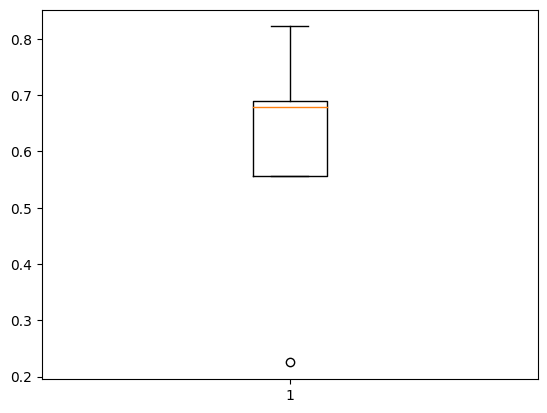

In [11]:
plt.boxplot(cv_results["test_r2"]);
(cv_results["test_r2"]).mean()

In [12]:
from sklearn.linear_model import Ridge,Lasso

In [20]:
folds = 3

In [91]:
import numpy as np
alphas = np.linspace(0.1,15,50)
alphas

array([ 0.1       ,  0.40408163,  0.70816327,  1.0122449 ,  1.31632653,
        1.62040816,  1.9244898 ,  2.22857143,  2.53265306,  2.83673469,
        3.14081633,  3.44489796,  3.74897959,  4.05306122,  4.35714286,
        4.66122449,  4.96530612,  5.26938776,  5.57346939,  5.87755102,
        6.18163265,  6.48571429,  6.78979592,  7.09387755,  7.39795918,
        7.70204082,  8.00612245,  8.31020408,  8.61428571,  8.91836735,
        9.22244898,  9.52653061,  9.83061224, 10.13469388, 10.43877551,
       10.74285714, 11.04693878, 11.35102041, 11.65510204, 11.95918367,
       12.26326531, 12.56734694, 12.87142857, 13.1755102 , 13.47959184,
       13.78367347, 14.0877551 , 14.39183673, 14.69591837, 15.        ])

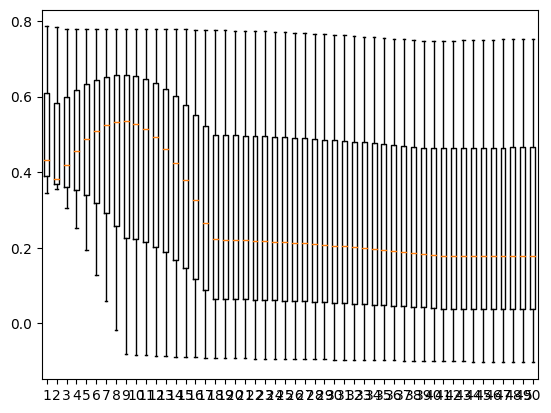

In [92]:
rmse = []
r2 = []
for al in alphas:
    la = Lasso(alpha=al)
    cv = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt.boxplot(r2);

In [94]:
alphas[2]

0.7081632653061224

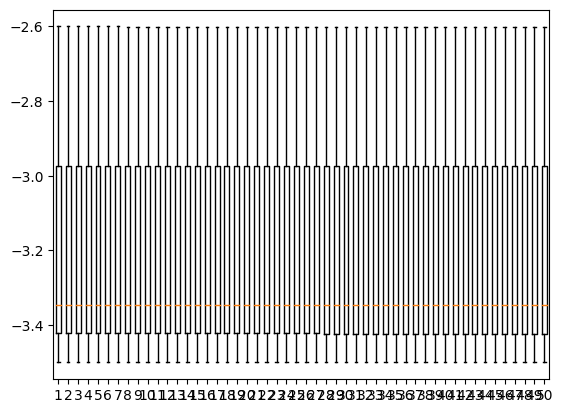

In [47]:
r2 = []
rmse = []
for al in alphas:
    ri = Ridge(alpha=al)
    cv = pd.DataFrame(cross_validate(ri,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(cv["train_neg_root_mean_squared_error"])
    r2.append(cv["train_r2"])
plt.boxplot(rmse);

0.41052291613150876


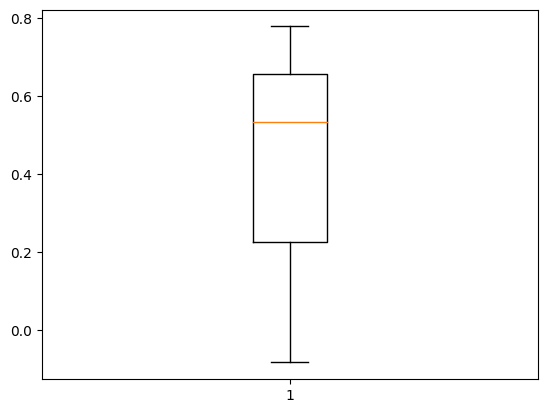

In [45]:
la = Lasso(alpha=2.5)
cv_la = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))

plt.boxplot(cv_la["test_r2"]);
print((cv_la["test_r2"]).mean())

In [46]:
cv_la

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.004196,0.007217,-10.301746,-13.791659,0.534920,0.775697,0.534941,0.775697,-3.925814,-3.611624
1,0.003745,0.006053,-10.977644,-14.387670,0.778704,0.803101,0.821016,0.803101,-3.015071,-3.698017
2,0.003711,0.005172,-19.509065,-15.338800,-0.082055,0.793772,0.552340,0.793772,-7.289336,-2.873250


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [130]:
alphas = np.linspace(0.01,10,100)
alphas

array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.13818182,  3.23909091,  3.34      ,  3.44090909,
        3.54181818,  3.64272727,  3.74363636,  3.84454545,  3.94545455,
        4.04636364,  4.14727273,  4.24818182,  4.34909091,  4.45      ,
        4.55090909,  4.65181818,  4.75272727,  4.85363636,  4.95454545,
        5.05545455,  5.15636364,  5.25727273,  5.35818182,  5.45909091,
        5.56      ,  5.66090909,  5.76181818,  5.86272727,  5.96363636,
        6.06454545,  6.16545455,  6.26636364,  6.36727273,  6.46818182,
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97

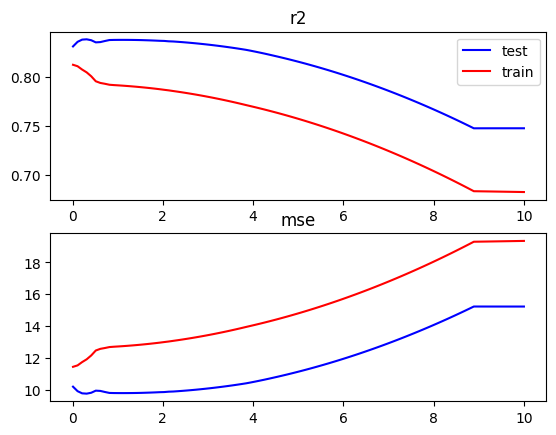

In [131]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_1 = np.sum(np.abs(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Lasso(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.abs(np.concatenate((la.coef_,la.intercept_))))/lr_beta_size_1)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

,train_r2,test_r2,test_mse,train_mse,alpha,betas
3,0.804424,0.838063,9.769892,11.922812,0.312727,0.762983


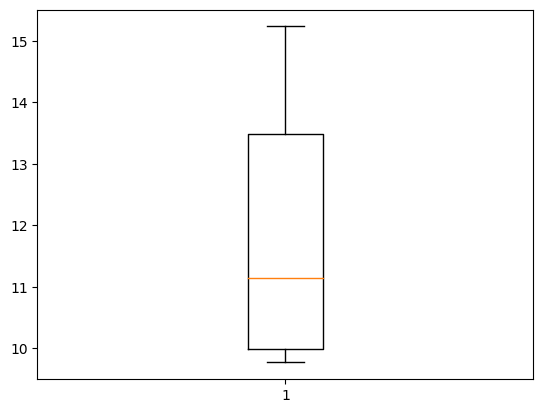

In [136]:
aux = "test_mse" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].min()]

In [149]:
#origin é 1. American, 2. European, 3. Japanese
la = Lasso(alpha=0.3)
la.fit(X,y)
for i in range(len(X.columns)):
    print(f"coef de {list(X.columns)[i]}:{la.coef_[i]} ")

coef de cylinders:-0.0 
coef de displacement:0.004835476034318025 
coef de horsepower:-0.012723485664797599 
coef de weight:-0.006424797764495242 
coef de acceleration:0.0 
coef de model year:0.7232029543032794 
coef de origin:0.558640470359639 


In [150]:
la.intercept_

array([-12.86394427])

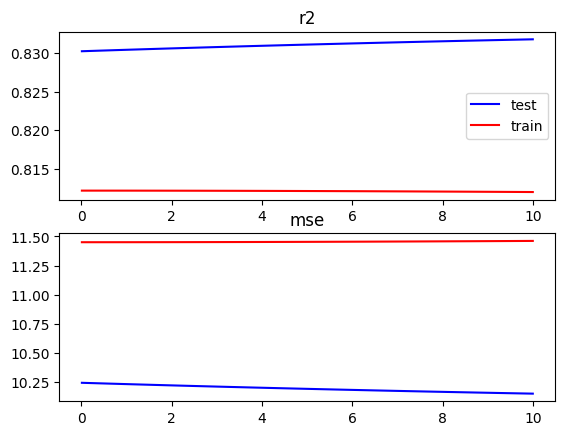

In [147]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_2 = np.sum(np.square(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Ridge(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.square(np.concatenate((la.coef_[0],la.intercept_))))/lr_beta_size_2)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

In [148]:
la.intercept_

array([-19.61524948])

In [151]:
from sklearn.linear_model import RidgeCV,LassoCV

In [172]:
la = LassoCV(cv=3,max_iter=10000,alphas=alphas,verbose=True);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

0.8214655764445802
0.01


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [177]:
la.coef_

array([-0.45308857,  0.01902205, -0.01671781, -0.00647735,  0.07789263,
        0.74989471,  1.39520622])

In [160]:
ri = RidgeCV(cv=3);
ri.fit(X,y);
print(ri.score(X,y))
print(ri.alpha_)

0.821478069051191
0.1


In [171]:
la = LassoCV(cv=3,max_iter=10000,verbose=True,selection="cyclic",eps=000000.1);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

0.6857041287894192
550.3365600270719


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [157]:
?LassoCV

Init signature:
LassoCV(
    *,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    copy_X=True,
    cv=None,
    verbose=False,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Lasso linear model with iterative fitting along a regularization path.

See glossary entry for :term:`cross-validation estimator`.

The best model is selected by cross-validation.

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Read more in the :ref:`User Guide <lasso>`.

Parameters
----------
eps : float, default=1e-3
    Length of the path. ``eps=1e-3`` means that
    ``alpha_min / alpha_max = 1e-3``.

n_alphas : int, default=100
    Number of alphas along the regularization path.

alphas : array-like, default=None
    List of alphas where to compute the models.
    If ``None`` alphas are set automatically.

fit_inter